# 1. Load Data
------

In [ ]:
!pip install kagglehub[pandas-datasets]
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import kagglehub
import os
# Store the path of the Kaggle dataset
path = kagglehub.dataset_download("jonassouza872/vitoria-da-conquista-weather-data-september")
# Check if the path is correct
print(path)

# List all files inside the downloaded folder
print(os.listdir(path))

/root/.cache/kagglehub/datasets/jonassouza872/vitoria-da-conquista-weather-data-september/versions/1
['temp.csv']


In [ ]:
import pandas as pd
df = pd.read_csv(f"{path}/temp.csv")  # Reads the declared path as a CSV file
df.head()  # Prints the first 5 rows of the dataset

,Timestamp,Temp_MPU6050_C,Temp_AHT20_C,Umid_AHT20_pct,Temp_BMP280_C,Press_BMP280_hPa,Temp_BMP180_C,Press_BMP180_hPa,Temp_DS18B20_C,Temp_NTC_C,Temp_DHT11_C,Umid_DHT11_pct
0,2025-08-31 22:31:02,20.86,19.90,73.37,21.28,921.24,20.19,923.02,25.69,22.26,20.03,66.0
1,2025-08-31 22:31:33,21.75,19.97,75.57,21.48,921.12,20.27,923.04,23.81,20.73,20.02,66.0
2,2025-08-31 22:32:05,21.80,19.75,74.31,21.25,921.20,20.16,923.06,22.50,20.88,20.02,67.0
3,2025-08-31 22:32:36,21.57,19.55,74.77,21.07,921.15,20.06,922.99,21.31,20.62,20.01,66.0
4,2025-08-31 22:33:07,21.66,19.60,75.09,21.12,921.25,20.06,923.02,21.88,20.95,20.00,66.0


In [ ]:
df.columns #all columns

Index(['Timestamp', 'Temp_MPU6050_C', 'Temp_AHT20_C', 'Umid_AHT20_pct',
       'Temp_BMP280_C', 'Press_BMP280_hPa', 'Temp_BMP180_C',
       'Press_BMP180_hPa', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C',
       'Umid_DHT11_pct'],
      dtype='object')

# 2. Loading Validation Data

-----------

- The validation data were obtained from the database of the National Institute of Meteorology of Brazil (INMET), a national agency, through the link https://tempo.inmet.gov.br/TabelaEstacoes/A001, covering the period from September 1st to September 30th, 2025.


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
df_validation = pd.read_csv('validation/validation_data_cleaned_BRT.csv',
                            sep=';',
                            encoding='latin1',
                            on_bad_lines='skip')

df_validation.head() # Display the first 5 rows of the validation dataset

,"ï»¿""Data""",Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
0,01/09/2025,0,"17,9","18,1","17,8","96,0","96,0","96,0","17,2","17,4","17,1","923,3","923,3","922,7","2,7","78,0","7,6",NaN,"0,0"
1,01/09/2025,100,"17,8","17,9","17,6","95,0","96,0","95,0","17,0","17,2","16,8","923,4","923,4","923,2","2,1","98,0","6,4",NaN,"0,0"
2,01/09/2025,200,"17,1","17,8","16,9","100,0","100,0","95,0","17,1","17,1","16,9","923,9","923,9","923,4","1,8","88,0","6,3",NaN,"0,0"
3,01/09/2025,300,"17,0","17,1","16,9",NaN,"100,0","100,0",NaN,"17,1","16,9","923,6","923,9","923,6","2,2","92,0","5,5",NaN,"0,0"
4,01/09/2025,400,"16,4","17,0","16,4","100,0","100,0","100,0","16,4","17,0","16,4","923,1","923,6","923,1","2,2","101,0","5,4",NaN,"0,0"


- Correct the time, it shows 1000 → 10:00.

In [ ]:
df_validation_clean = df_validation.dropna() #Remove rows with ANY NaN values
df_validation = df_validation_clean
df_validation #Clean data

,"ï»¿""Data""",Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
10,01/09/2025,1000,"16,2","16,2","15,7","100,0","100,0","100,0","16,1","16,2","15,7","923,2","923,3","922,7","1,7","111,0","5,2","80,30","0,0"
11,01/09/2025,1100,"17,1","18,1","16,2","93,0","100,0","90,0","15,9","16,6","15,8","924,2","924,2","923,2","3,9","131,0","7,2","760,70","0,0"
12,01/09/2025,1200,"18,3","19,0","17,0","85,0","95,0","85,0","15,8","16,6","15,7","924,9","924,9","924,2","3,5","113,0","7,3","1128,20","0,0"
13,01/09/2025,1300,"19,3","19,9","18,3","79,0","86,0","78,0","15,6","16,6","15,3","925,0","925,1","924,8","3,2","111,0","10,1","1536,20","0,0"
14,01/09/2025,1400,"20,8","21,0","19,3","72,0","79,0","70,0","15,5","16,6","15,1","924,6","925,1","924,5","4,0","111,0","9,3","1724,10","0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,30/09/2025,1700,"25,4","26,6","24,4","44,0","47,0","43,0","12,1","13,2","11,8","919,6","920,6","919,6","3,4","95,0","9,7","4265,70","0,0"
714,30/09/2025,1800,"25,6","26,3","25,0","44,0","46,0","41,0","12,4","13,0","11,7","918,9","919,6","918,9","3,3","109,0","9,8","3657,40","0,0"
715,30/09/2025,1900,"25,4","25,9","25,0","44,0","45,0","43,0","12,3","12,8","11,9","919,0","919,0","918,8","3,1","112,0","9,3","2720,50","0,0"
716,30/09/2025,2000,"24,0","25,7","24,0","44,0","46,0","43,0","11,1","12,7","11,1","919,4","919,4","919,0","3,8","116,0","10,0","1573,90","0,0"


- Correct the time, it's 1000 → 10 hours.

In [ ]:
df_validation['Hora (UTC)'] = df_validation['Hora (UTC)'].astype(str).str.zfill(4)  # Ensure 4 digits (e.g., 1000)
df_validation['Hora (UTC)'] = df_validation['Hora (UTC)'].str[:2] + ':' + df_validation['Hora (UTC)'].str[2:]  #Split into HH:MM
df_validation.head()

,"ï»¿""Data""",Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
10,01/09/2025,10:00,"16,2","16,2","15,7","100,0","100,0","100,0","16,1","16,2","15,7","923,2","923,3","922,7","1,7","111,0","5,2","80,30","0,0"
11,01/09/2025,11:00,"17,1","18,1","16,2","93,0","100,0","90,0","15,9","16,6","15,8","924,2","924,2","923,2","3,9","131,0","7,2","760,70","0,0"
12,01/09/2025,12:00,"18,3","19,0","17,0","85,0","95,0","85,0","15,8","16,6","15,7","924,9","924,9","924,2","3,5","113,0","7,3","1128,20","0,0"
13,01/09/2025,13:00,"19,3","19,9","18,3","79,0","86,0","78,0","15,6","16,6","15,3","925,0","925,1","924,8","3,2","111,0","10,1","1536,20","0,0"
14,01/09/2025,14:00,"20,8","21,0","19,3","72,0","79,0","70,0","15,5","16,6","15,1","924,6","925,1","924,5","4,0","111,0","9,3","1724,10","0,0"


Now, we will need to generate a new file with the time in Brasília Time (BRT), since our project analysis data is in BRT, and also convert it to a timestamp.

In [ ]:
# Convert to Timestamp (adjust column names based on output above)
df_validation['Timestamp'] = pd.to_datetime(df_validation['ï»¿"Data"'] + ' ' + df_validation['Hora (UTC)'], format='%d/%m/%Y %H:%M')
df_validation.set_index('Timestamp', inplace=True) # Create new Timestamp column
df_validation.head()

,"ï»¿""Data""",Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
Timestamp,,,,,,,,,,,,,,,,,,,
2025-09-01 10:00:00,01/09/2025,10:00,"16,2","16,2","15,7","100,0","100,0","100,0","16,1","16,2","15,7","923,2","923,3","922,7","1,7","111,0","5,2","80,30","0,0"
2025-09-01 11:00:00,01/09/2025,11:00,"17,1","18,1","16,2","93,0","100,0","90,0","15,9","16,6","15,8","924,2","924,2","923,2","3,9","131,0","7,2","760,70","0,0"
2025-09-01 12:00:00,01/09/2025,12:00,"18,3","19,0","17,0","85,0","95,0","85,0","15,8","16,6","15,7","924,9","924,9","924,2","3,5","113,0","7,3","1128,20","0,0"
2025-09-01 13:00:00,01/09/2025,13:00,"19,3","19,9","18,3","79,0","86,0","78,0","15,6","16,6","15,3","925,0","925,1","924,8","3,2","111,0","10,1","1536,20","0,0"
2025-09-01 14:00:00,01/09/2025,14:00,"20,8","21,0","19,3","72,0","79,0","70,0","15,5","16,6","15,1","924,6","925,1","924,5","4,0","111,0","9,3","1724,10","0,0"


In [ ]:
# Drop date and time columns
df_validation = df_validation.drop(columns=['ï»¿"Data"', 'Hora (UTC)'])

df_validation.head()

,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
Timestamp,,,,,,,,,,,,,,,,,
2025-09-01 10:00:00,"16,2","16,2","15,7","100,0","100,0","100,0","16,1","16,2","15,7","923,2","923,3","922,7","1,7","111,0","5,2","80,30","0,0"
2025-09-01 11:00:00,"17,1","18,1","16,2","93,0","100,0","90,0","15,9","16,6","15,8","924,2","924,2","923,2","3,9","131,0","7,2","760,70","0,0"
2025-09-01 12:00:00,"18,3","19,0","17,0","85,0","95,0","85,0","15,8","16,6","15,7","924,9","924,9","924,2","3,5","113,0","7,3","1128,20","0,0"
2025-09-01 13:00:00,"19,3","19,9","18,3","79,0","86,0","78,0","15,6","16,6","15,3","925,0","925,1","924,8","3,2","111,0","10,1","1536,20","0,0"
2025-09-01 14:00:00,"20,8","21,0","19,3","72,0","79,0","70,0","15,5","16,6","15,1","924,6","925,1","924,5","4,0","111,0","9,3","1724,10","0,0"


- Convert UTC-BRT

In [ ]:
# Convert from UTC to BRT by subtracting 3 hours
df_validation.index = df_validation.index - pd.Timedelta(hours=3)
df_validation.head()

,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
Timestamp,,,,,,,,,,,,,,,,,
2025-09-01 07:00:00,"16,2","16,2","15,7","100,0","100,0","100,0","16,1","16,2","15,7","923,2","923,3","922,7","1,7","111,0","5,2","80,30","0,0"
2025-09-01 08:00:00,"17,1","18,1","16,2","93,0","100,0","90,0","15,9","16,6","15,8","924,2","924,2","923,2","3,9","131,0","7,2","760,70","0,0"
2025-09-01 09:00:00,"18,3","19,0","17,0","85,0","95,0","85,0","15,8","16,6","15,7","924,9","924,9","924,2","3,5","113,0","7,3","1128,20","0,0"
2025-09-01 10:00:00,"19,3","19,9","18,3","79,0","86,0","78,0","15,6","16,6","15,3","925,0","925,1","924,8","3,2","111,0","10,1","1536,20","0,0"
2025-09-01 11:00:00,"20,8","21,0","19,3","72,0","79,0","70,0","15,5","16,6","15,1","924,6","925,1","924,5","4,0","111,0","9,3","1724,10","0,0"


In [ ]:
df_validation = df_validation.replace(',', '.', regex=True) #Convert , to .

- Now the dataset is 100% clean and ready to be used for project data validation.

In [ ]:
df_validation.to_csv('validation_data_cleaned_BRT.csv')#Convert and save the cleaned validation data with BRT timestamp

from google.colab import files
files.download('validation_data_cleaned_BRT.csv')#Download the cleaned CSV file with BRT timestamp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_validation.shape # 331 rows of data
df_validation.columns

Index(['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)', 'Umi. Ins. (%)',
       'Umi. Max. (%)', 'Umi. Min. (%)', 'Pto Orvalho Ins. (C)',
       'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)', 'Pressao Ins. (hPa)',
       'Pressao Max. (hPa)', 'Pressao Min. (hPa)', 'Vel. Vento (m/s)',
       'Dir. Vento (m/s)', 'Raj. Vento (m/s)', 'Radiacao (KJ/mÂ²)',
       'Chuva (mm)'],
      dtype='object')

In [ ]:
Temperature_ref = df_validation['Temp. Ins. (C)']  # stores temperature validation data
Humidity_ref = df_validation['Umi. Ins. (%)']  # humidity validation
Pressure_ref = df_validation['Pressao Ins. (hPa)']  # pressure validation


# 3. Adjust validation data and real project data.

---

PROBLEM: We have an issue because my real project has around 80,000 data points, while the meteorological institute’s dataset has about 300 after cleaning inconsistent data such as NaN values.

In [ ]:
df.shape

(82430, 12)

In [ ]:
df_validation.shape

(331, 17)

To solve this, I will select the data from my project that correspond to the same timestamps as the data from the national institute and insert these sensor readings into the df_validation DataFrame, so that the comparison is fair and based on the same time period.

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  #converts the 'Timestamp' column to a special datetime format
df = df.sort_values('Timestamp')  #keeps the dataset in chronological order based on tim

In [ ]:
df_validation = df_validation.reset_index()  #converts the datetime index back into a regular column for better organization
df_validation = df_validation.rename(columns={'index': 'Timestamp'})  #renames the index column to Timestamp
df_validation['Timestamp'] = pd.to_datetime(df_validation['Timestamp'])  # converts the 'Timestamp' column to Pandas datetime format
df_validation = df_validation.sort_values('Timestamp')  #Keeps the validation dataset in chronological order

In [ ]:
df_validation = pd.merge_asof( #approximate merge of datasets
    df_validation, #dataframe to be kept
    df, # dataframe to be added (adds the measurement columns to the validation dataset)
    on='Timestamp', #column used to align data over time
    direction='nearest', # searches for the closest matching time between the datasets
    tolerance=pd.Timedelta('30s') # maximum tolerance of 30 seconds difference between the exact measurement times of each dataset
)

In [ ]:
df_validation.head()

,Timestamp,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),...,Temp_AHT20_C,Umid_AHT20_pct,Temp_BMP280_C,Press_BMP280_hPa,Temp_BMP180_C,Press_BMP180_hPa,Temp_DS18B20_C,Temp_NTC_C,Temp_DHT11_C,Umid_DHT11_pct
0,2025-09-01 07:00:00,16.2,16.2,15.7,100.0,100.0,100.0,16.1,16.2,15.7,...,17.15,81.91,18.73,920.97,17.42,922.42,17.06,18.53,17.05,69.0
1,2025-09-01 08:00:00,17.1,18.1,16.2,93.0,100.0,90.0,15.9,16.6,15.8,...,18.03,77.72,19.62,922.07,18.16,923.27,17.94,19.65,18.03,65.0
2,2025-09-01 09:00:00,18.3,19.0,17.0,85.0,95.0,85.0,15.8,16.6,15.7,...,18.82,70.72,20.40,922.38,19.09,923.70,18.81,20.43,19.01,58.0
3,2025-09-01 10:00:00,19.3,19.9,18.3,79.0,86.0,78.0,15.6,16.6,15.3,...,20.20,66.27,21.76,922.37,20.45,923.63,20.13,21.57,20.05,55.0
4,2025-09-01 11:00:00,20.8,21.0,19.3,72.0,79.0,70.0,15.5,16.6,15.1,...,21.95,61.69,23.46,921.51,22.28,923.07,22.06,23.76,22.02,49.0


We can now see that the validation dataset contains both the validation values and the temperature measurements from my project. There is also good time alignment and synchronization, as the merge kept only the data points recorded at approximately the same moments in both datasets (with a 30-second tolerance).

In [ ]:
df_validation.to_csv('validation_and_Measured_Data_cleaned_BRT_.csv')#Convert and save the cleaned validation data with BRT timestamp

from google.colab import files
files.download('validation_and_Measured_Data_cleaned_BRT_.csv')#Download the cleaned CSV file with BRT timestamp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. Sensor Comparison and Validation

----------------------

## 4.1. Bland–Altman (BA) Analysis

------------------

The Bland–Altman (BA) Analysis is a statistical method used to assess the agreement between two quantitative measurement systems that evaluate the same variable. It represents the difference between paired measurements as a function of their mean, allowing visualization of systematic bias and random variability. In this project, the BA analysis is applied to compare temperature, humidity, and pressure data obtained from the experimental setup with government validation datasets. This approach enables the identification of potential deviations or calibration inconsistencies between sensors.

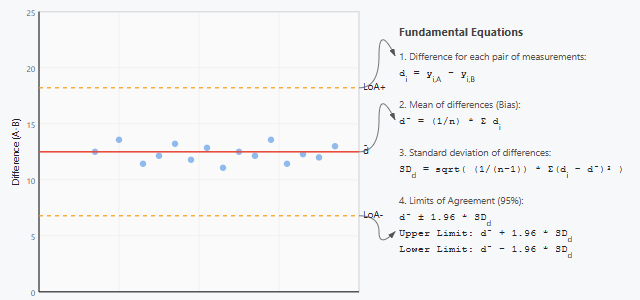

- Ideal Bias = 0°C → One sensor does not systematically measure higher or lower than the other; the closer to zero, the better the agreement.

- Ideal LoA (Limits of Agreement) = narrow and symmetric → Limits close to the bias (e.g., -0.5°C to +0.5°C) indicate low variability; the narrower, the more consistent the agreement between sensors.

### 4.1.1. Temperature Analysis
------

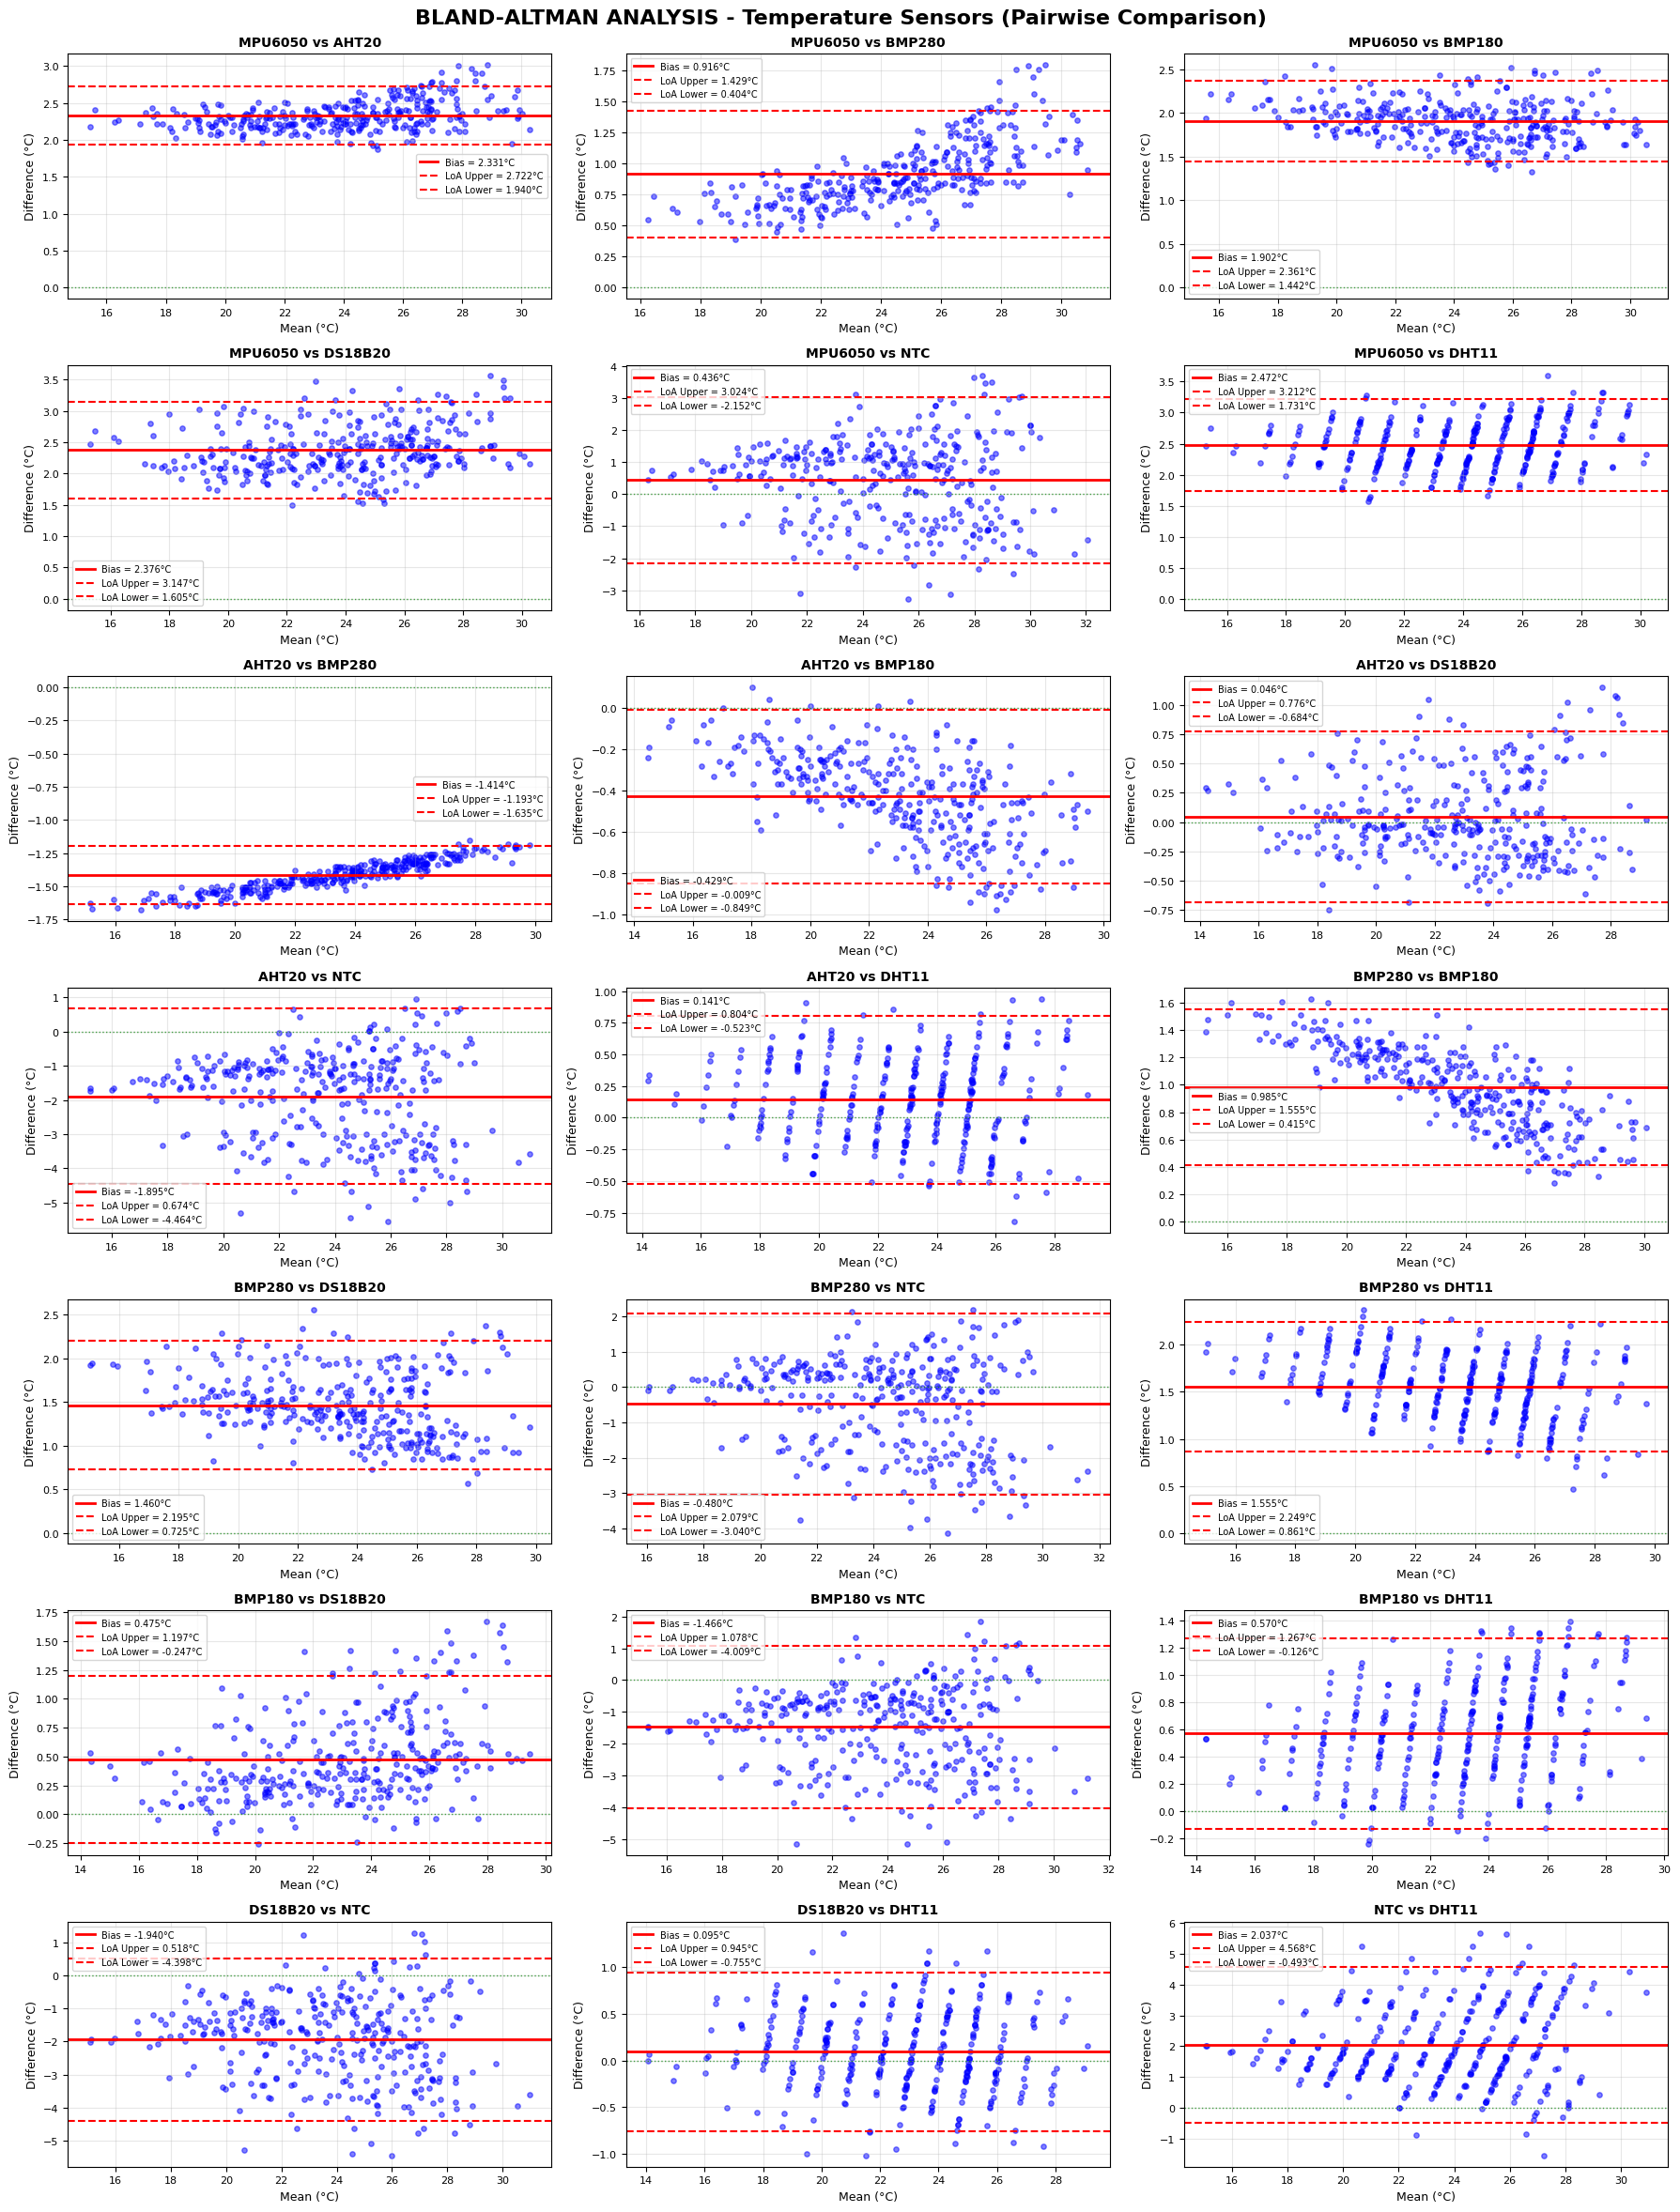

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

temp_sensors = ['Temp_MPU6050_C', 'Temp_AHT20_C', 'Temp_BMP280_C',
                'Temp_BMP180_C', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C']# Define all temperature sensors

sensor_pairs = list(combinations(temp_sensors, 2)) #Generate all pairwise combinations (21 pairs)
fig, axes = plt.subplots(7, 3, figsize=(18, 24))#Create figure with subplots (7 rows x 3 columns = 21 plots)
axes = axes.flatten()  #Flatten to 1D array for easy indexing
results = []# Storage for results

for idx, (sensor1, sensor2) in enumerate(sensor_pairs):
    ax = axes[idx]

    data1 = df_validation[sensor1]
    data2 = df_validation[sensor2]
    mean_values = (data1 + data2) / 2  # Calculate mean
    diff_values = data1 - data2 #Calculate difference
    bias = diff_values.mean()  # Calculate Bland-Altman metrics
    std_diff = diff_values.std() #Std
    loa_upper = bias + 1.96 * std_diff  # Upper Limit of Agreement
    loa_lower = bias - 1.96 * std_diff  # Lower Limit of Agreement

    # Store results
    results.append({
        'Sensor1': sensor1,
        'Sensor2': sensor2,
        'Bias': bias,
        'LoA_Upper': loa_upper,
        'LoA_Lower': loa_lower,
        'Std': std_diff
    })

    ax.scatter(mean_values, diff_values, alpha=0.5, s=15, color='blue')
    ax.axhline(bias, color='red', linestyle='-', linewidth=2, label=f'Bias = {bias:.3f}°C')#bias line
    ax.axhline(loa_upper, color='red', linestyle='--', linewidth=1.5,
               label=f'LoA Upper = {loa_upper:.3f}°C') # Plot LoA line upper
    ax.axhline(loa_lower, color='red', linestyle='--', linewidth=1.5,   # Plot LoA line lower
               label=f'LoA Lower = {loa_lower:.3f}°C')
    ax.axhline(0, color='green', linestyle=':', linewidth=1, alpha=0.7) #Zero line

    # Formatting
    sensor1_short = sensor1.replace('Temp_', '').replace('_C', '')
    sensor2_short = sensor2.replace('Temp_', '').replace('_C', '')
    ax.set_title(f'{sensor1_short} vs {sensor2_short}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Mean (°C)', fontsize=9)
    ax.set_ylabel('Difference (°C)', fontsize=9)
    ax.legend(fontsize=7, loc='best')
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)

plt.tight_layout()
plt.suptitle('BLAND-ALTMAN ANALYSIS - Temperature Sensors (Pairwise Comparison)',  #title
             fontsize=16, fontweight='bold', y=0.98)
plt.subplots_adjust(top=0.96)
plt.show()


In [ ]:
import pandas as pd

df_results = pd.DataFrame(results)
print("\n" + "=" * 80)
print("BLAND-ALTMAN RESULTS SUMMARY - TEMPERATURE SENSORS (PAIRWISE)")
print("=" * 80)
print(df_results.to_string(index=False))
print("=" * 80)


BLAND-ALTMAN RESULTS SUMMARY - TEMPERATURE SENSORS (PAIRWISE)
       Sensor1        Sensor2      Bias  LoA_Upper  LoA_Lower      Std
Temp_MPU6050_C   Temp_AHT20_C  2.330547   2.721549   1.939545 0.199491
Temp_MPU6050_C  Temp_BMP280_C  0.916413   1.429278   0.403549 0.261665
Temp_MPU6050_C  Temp_BMP180_C  1.901550   2.361319   1.441781 0.234576
Temp_MPU6050_C Temp_DS18B20_C  2.376353   3.147459   1.605246 0.393422
Temp_MPU6050_C     Temp_NTC_C  0.435988   3.024015  -2.152039 1.320422
Temp_MPU6050_C   Temp_DHT11_C  2.471646   3.212357   1.730936 0.377914
  Temp_AHT20_C  Temp_BMP280_C -1.414134  -1.193476  -1.634791 0.112580
  Temp_AHT20_C  Temp_BMP180_C -0.428997  -0.009187  -0.848807 0.214189
  Temp_AHT20_C Temp_DS18B20_C  0.045805   0.775825  -0.684214 0.372459
  Temp_AHT20_C     Temp_NTC_C -1.894559   0.674399  -4.463518 1.310693
  Temp_AHT20_C   Temp_DHT11_C  0.140671   0.804459  -0.523117 0.338667
 Temp_BMP280_C  Temp_BMP180_C  0.985137   1.554869   0.415405 0.290679
 Temp_BMP280_C

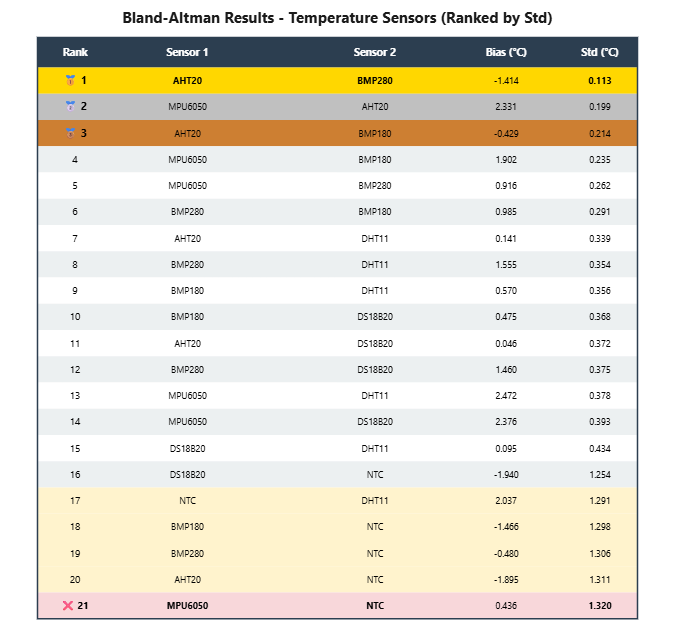

The Bland–Altman analysis among the 21 pairs of temperature sensors revealed that the AHT20 dominates the top three positions in the ranking, demonstrating exceptional consistency with extremely low standard deviations (0.113–0.214 °C) when compared with the BMP280, MPU6050, and BMP180, highlighting its superior stability and reliability. The first-ranked pair (AHT20 vs BMP280, Std = 0.113 °C) shows that even with a systematic bias of –1.414 °C, the agreement is highly predictable, allowing these sensors to operate together with a simple offset correction.

The AHT20, DS18B20, DHT11, and BMP180 form an interchangeable group with standard deviations below 0.4 °C and near-zero biases, making them suitable for redundancy or backup systems without significant adjustments. In contrast, the NTC exhibits high variability (Std > 1.25 °C) across all comparisons, making it unsuitable for joint operation without strict individual calibration.

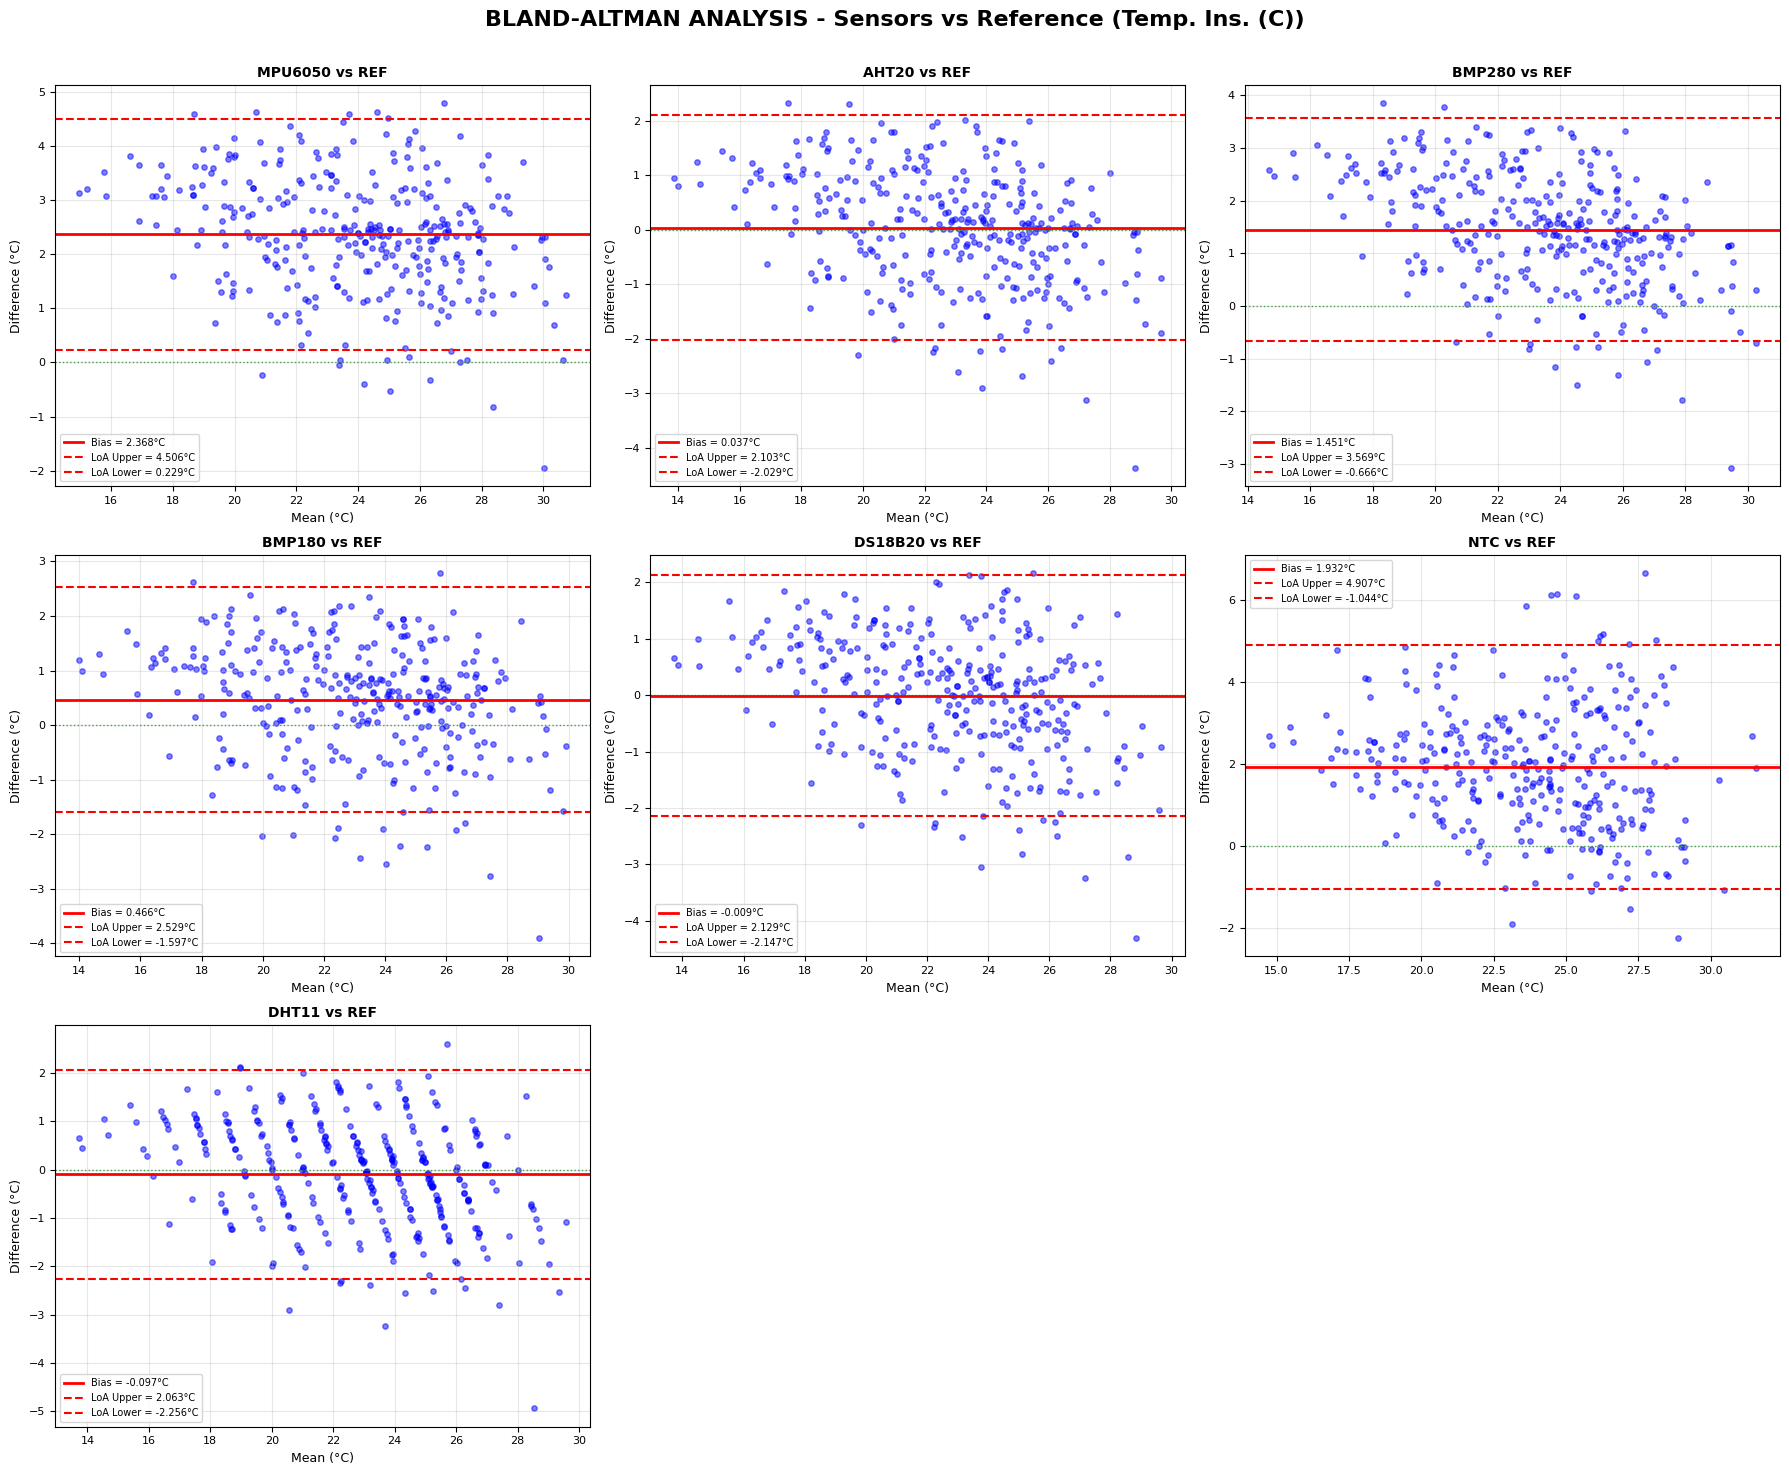

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

reference_sensor = 'Temp. Ins. (C)' #Reference dataset column
temp_sensors = ['Temp_MPU6050_C', 'Temp_AHT20_C', 'Temp_BMP280_C',
                'Temp_BMP180_C', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C'] #Define all temperature sensors

# Convert all columns to numeric (ignore non-numeric values)
for col in temp_sensors + [reference_sensor]:
    df_validation[col] = pd.to_numeric(df_validation[col], errors='coerce')

fig, axes = plt.subplots(3, 3, figsize=(18, 15)) #Create figure with subplots (3 rows x 3 columns = 9 plots)
axes = axes.flatten() #Flatten to 1D array for easy indexing
results_ref = [] # Storage for reference comparison results

for idx, sensor in enumerate(temp_sensors):
    ax = axes[idx]

    data1 = df_validation[sensor]
    data2 = df_validation[reference_sensor]
    mean_values = (data1 + data2) / 2  # Calculate mean
    diff_values = data1 - data2 #Calculate difference
    bias = diff_values.mean()  # Calculate Bland-Altman metrics
    std_diff = diff_values.std() #Std
    loa_upper = bias + 1.96 * std_diff  # Upper Limit of Agreement
    loa_lower = bias - 1.96 * std_diff  # Lower Limit of Agreement

    # Store results
    results_ref.append({
        'Sensor': sensor,
        'Reference': reference_sensor,
        'Bias': bias,
        'LoA_Upper': loa_upper,
        'LoA_Lower': loa_lower,
        'Std': std_diff
    })

    ax.scatter(mean_values, diff_values, alpha=0.5, s=15, color='blue')
    ax.axhline(bias, color='red', linestyle='-', linewidth=2, label=f'Bias = {bias:.3f}°C') #bias line
    ax.axhline(loa_upper, color='red', linestyle='--', linewidth=1.5,
               label=f'LoA Upper = {loa_upper:.3f}°C') # Plot LoA line upper
    ax.axhline(loa_lower, color='red', linestyle='--', linewidth=1.5,   # Plot LoA line lower
               label=f'LoA Lower = {loa_lower:.3f}°C')
    ax.axhline(0, color='green', linestyle=':', linewidth=1, alpha=0.7) #Zero line

    # Formatting
    sensor_short = sensor.replace('Temp_', '').replace('_C', '')
    ax.set_title(f'{sensor_short} vs REF', fontsize=10, fontweight='bold')
    ax.set_xlabel('Mean (°C)', fontsize=9)
    ax.set_ylabel('Difference (°C)', fontsize=9)
    ax.legend(fontsize=7, loc='best')
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)

# Hide any unused subplots (if less than 9 sensors)
for j in range(len(temp_sensors), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('BLAND-ALTMAN ANALYSIS - Sensors vs Reference (Temp. Ins. (C))',  #title
             fontsize=16, fontweight='bold', y=0.98)
plt.subplots_adjust(top=0.93)
plt.show()


In [ ]:
import pandas as pd

df_results = pd.DataFrame(results_ref)
print("\n" + "=" * 80)
print("BLAND-ALTMAN RESULTS SUMMARY - TEMPERATURE SENSORS VS REFERENCE (INMET)")
print("=" * 80)
print(df_results.to_string(index=False))
print("=" * 80)


BLAND-ALTMAN RESULTS SUMMARY - TEMPERATURE SENSORS VS REFERENCE (INMET)
        Sensor      Reference      Bias  LoA_Upper  LoA_Lower      Std
Temp_MPU6050_C Temp. Ins. (C)  2.367629   4.505874   0.229385 1.090941
  Temp_AHT20_C Temp. Ins. (C)  0.037082   2.103408  -2.029244 1.054248
 Temp_BMP280_C Temp. Ins. (C)  1.451216   3.568858  -0.666426 1.080429
 Temp_BMP180_C Temp. Ins. (C)  0.466079   2.529150  -1.596992 1.052587
Temp_DS18B20_C Temp. Ins. (C) -0.008723   2.129445  -2.146892 1.090902
    Temp_NTC_C Temp. Ins. (C)  1.931641   4.907221  -1.043939 1.518153
  Temp_DHT11_C Temp. Ins. (C) -0.096646   2.063001  -2.256294 1.101861


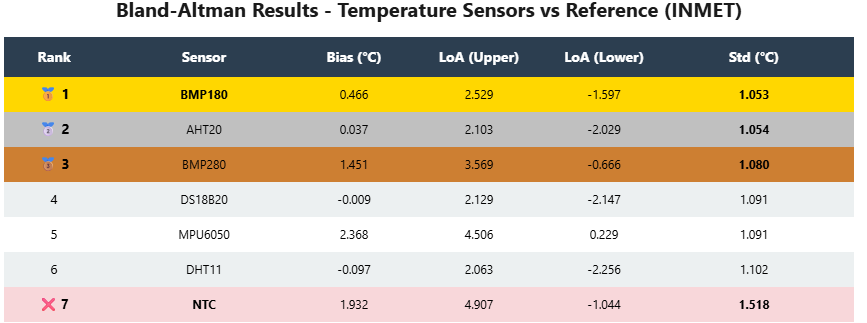

The final Bland-Altman analysis reveals a clear distinction between the accuracy (Bias) and precision (Std) of the sensors. In terms of accuracy, the DS18B20 (-0.009°C) and AHT20 (0.037°C) demonstrate ideal performance with a virtually null offset (systematic error), confirming their excellent factory calibration. In stark contrast, the NTC (1.932°C) and MPU6050 (2.368°C) are highly inaccurate, exhibiting a significant bias that necessitates software correction. The most revealing finding, however, lies in the precision: the fact that six of the seven sensors show a nearly identical Standard Deviation (Std)—between 1.05°C and 1.10°C—suggests this value does not reflect individual electronic noise, but rather the "microclimate noise." This represents the real, random temperature fluctuation between the INMET reference station and the physical test location. The NTC (Std 1.518°C) is the only sensor imprecise enough that its own internal noise visibly compounded this baseline variation.

### 4.1.2 Humidity Analysis

----------

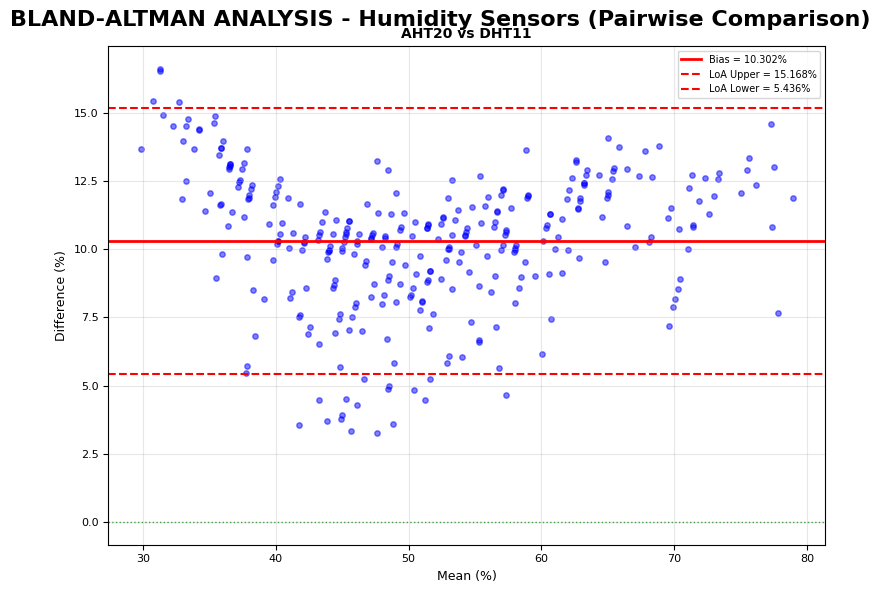


BLAND-ALTMAN RESULTS SUMMARY - HUMIDITY SENSORS (PAIRWISE)
       Sensor1        Sensor2      Bias  LoA_Upper  LoA_Lower    Std
Umid_AHT20_pct Umid_DHT11_pct 10.302226  15.168317   5.436134 2.4827


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
import pandas as pd

humidity_sensors = [
    'Umid_AHT20_pct',
    'Umid_DHT11_pct'
] #Define all humidity sensors

sensor_pairs_hum = list(combinations(humidity_sensors, 2)) #Generate all pairwise combinations
fig, axes = plt.subplots(1, 1, figsize=(8, 6)) #Create figure with subplots (only 1 pair)
axes = np.array([axes]).flatten() #Flatten to 1D array for easy indexing
results_hum = [] #Storage for results

for idx, (sensor1, sensor2) in enumerate(sensor_pairs_hum):
    ax = axes[idx]

    data1 = df_validation[sensor1]
    data2 = df_validation[sensor2]
    mean_values = (data1 + data2) / 2  # Calculate mean
    diff_values = data1 - data2 #Calculate difference
    bias = diff_values.mean()  # Calculate Bland-Altman metrics
    std_diff = diff_values.std() #Std
    loa_upper = bias + 1.96 * std_diff  # Upper Limit of Agreement
    loa_lower = bias - 1.96 * std_diff  # Lower Limit of Agreement

    # Store results
    results_hum.append({
        'Sensor1': sensor1,
        'Sensor2': sensor2,
        'Bias': bias,
        'LoA_Upper': loa_upper,
        'LoA_Lower': loa_lower,
        'Std': std_diff
    })

    ax.scatter(mean_values, diff_values, alpha=0.5, s=15, color='blue')
    ax.axhline(bias, color='red', linestyle='-', linewidth=2, label=f'Bias = {bias:.3f}%')#bias line
    ax.axhline(loa_upper, color='red', linestyle='--', linewidth=1.5,
               label=f'LoA Upper = {loa_upper:.3f}%') # Plot LoA line upper
    ax.axhline(loa_lower, color='red', linestyle='--', linewidth=1.5,   # Plot LoA line lower
               label=f'LoA Lower = {loa_lower:.3f}%')
    ax.axhline(0, color='green', linestyle=':', linewidth=1, alpha=0.7) #Zero line

    # Formatting
    sensor1_short = sensor1.replace('Umid_', '').replace('_pct', '')
    sensor2_short = sensor2.replace('Umid_', '').replace('_pct', '')
    ax.set_title(f'{sensor1_short} vs {sensor2_short}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Mean (%)', fontsize=9)
    ax.set_ylabel('Difference (%)', fontsize=9)
    ax.legend(fontsize=7, loc='best')
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)

plt.tight_layout()
plt.suptitle('BLAND-ALTMAN ANALYSIS - Humidity Sensors (Pairwise Comparison)',  #title
             fontsize=16, fontweight='bold', y=0.98)
plt.subplots_adjust(top=0.92)
plt.show()

# Print summary table
df_results_hum = pd.DataFrame(results_hum)
print("\n" + "=" * 80)
print("BLAND-ALTMAN RESULTS SUMMARY - HUMIDITY SENSORS (PAIRWISE)")
print("=" * 80)
print(df_results_hum.to_string(index=False))
print("=" * 80)

The analysis reveals a systematic and statistically significant disagreement between the sensors, featuring a massive Bias of 10.30%, which indicates the AHT20 consistently measures values far above the DHT11. The precision of this difference (Std) is 2.48%, which is relatively low compared to the size of the systematic error, showing this difference is stable. The Limits of Agreement (5.44% to 15.17%) confirm that the error range never crosses zero, proving the sensors are in no way interchangeable.

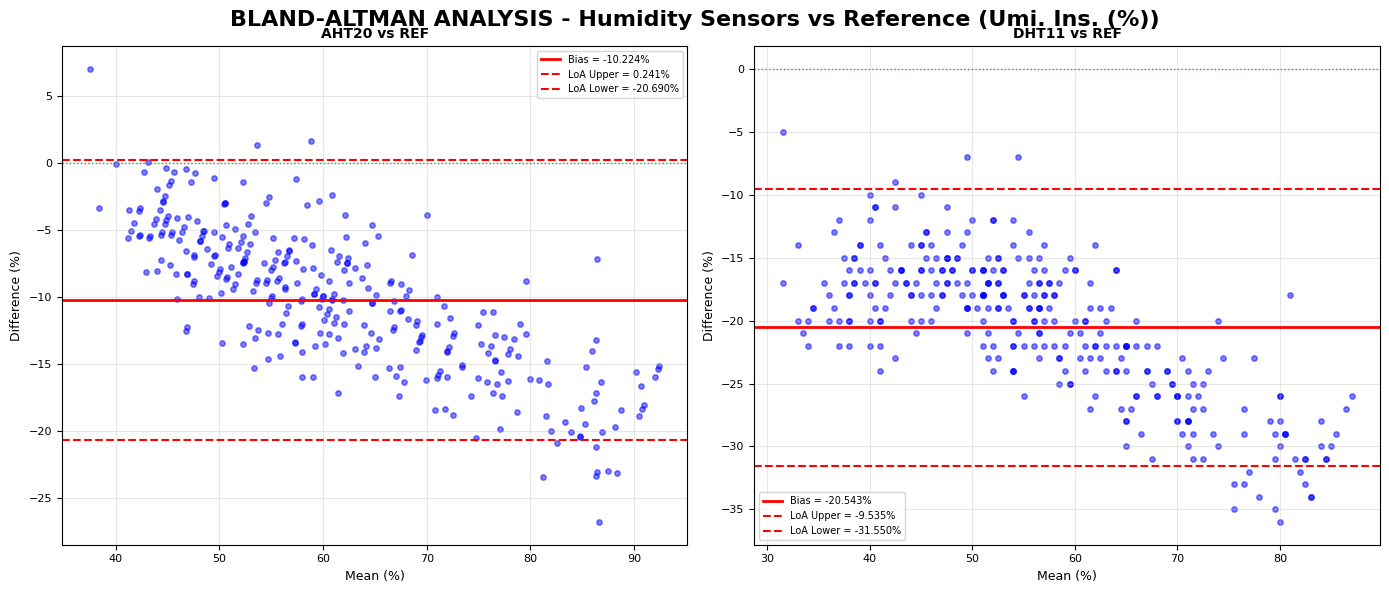


BLAND-ALTMAN RESULTS SUMMARY - HUMIDITY SENSORS vs REFERENCE
        Sensor     Reference       Bias  LoA_Upper  LoA_Lower      Std
Umid_AHT20_pct Umi. Ins. (%) -10.224377   0.241342 -20.690096 5.339653
Umid_DHT11_pct Umi. Ins. (%) -20.542683  -9.535323 -31.550043 5.616000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

reference_hum = 'Umi. Ins. (%)' #Reference dataset column
humidity_sensors = [
    'Umid_AHT20_pct',
    'Umid_DHT11_pct'
] #Define all humidity sensors

# Convert columns to numeric (ignore non-numeric values)
for col in humidity_sensors + [reference_hum]:
    df_validation[col] = pd.to_numeric(df_validation[col], errors='coerce')

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) #Create figure with subplots (1 row x 2 columns)
axes = axes.flatten() #Flatten to 1D array for easy indexing
results_ref_hum = [] #Storage for results

for idx, sensor in enumerate(humidity_sensors):
    ax = axes[idx]

    data1 = df_validation[sensor]
    data2 = df_validation[reference_hum]
    mean_values = (data1 + data2) / 2  # Calculate mean
    diff_values = data1 - data2 #Calculate difference
    bias = diff_values.mean()  # Calculate Bland-Altman metrics
    std_diff = diff_values.std() #Std
    loa_upper = bias + 1.96 * std_diff  # Upper Limit of Agreement
    loa_lower = bias - 1.96 * std_diff  # Lower Limit of Agreement

    # Store results
    results_ref_hum.append({
        'Sensor': sensor,
        'Reference': reference_hum,
        'Bias': bias,
        'LoA_Upper': loa_upper,
        'LoA_Lower': loa_lower,
        'Std': std_diff
    })

    ax.scatter(mean_values, diff_values, alpha=0.5, s=15, color='blue')
    ax.axhline(bias, color='red', linestyle='-', linewidth=2, label=f'Bias = {bias:.3f}%')#bias line
    ax.axhline(loa_upper, color='red', linestyle='--', linewidth=1.5,
               label=f'LoA Upper = {loa_upper:.3f}%') # Plot LoA line upper
    ax.axhline(loa_lower, color='red', linestyle='--', linewidth=1.5,   # Plot LoA line lower
               label=f'LoA Lower = {loa_lower:.3f}%')
    ax.axhline(0, color='green', linestyle=':', linewidth=1, alpha=0.7) #Zero line

    # Formatting
    sensor_short = sensor.replace('Umid_', '').replace('_pct', '')
    ax.set_title(f'{sensor_short} vs REF', fontsize=10, fontweight='bold')
    ax.set_xlabel('Mean (%)', fontsize=9)
    ax.set_ylabel('Difference (%)', fontsize=9)
    ax.legend(fontsize=7, loc='best')
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)

plt.tight_layout()
plt.suptitle('BLAND-ALTMAN ANALYSIS - Humidity Sensors vs Reference (Umi. Ins. (%))',  #title
             fontsize=16, fontweight='bold', y=0.98)
plt.subplots_adjust(top=0.92)
plt.show()

# Print summary table
df_results_ref_hum = pd.DataFrame(results_ref_hum)
print("\n" + "=" * 80)
print("BLAND-ALTMAN RESULTS SUMMARY - HUMIDITY SENSORS vs REFERENCE")
print("=" * 80)
print(df_results_ref_hum.to_string(index=False))
print("=" * 80)

The analysis shows that both sensors are extremely inaccurate (biased), systematically reading values far below the reference (Umi. Ins.). The AHT20 (Bias -10.22%) is poor, but the DHT11 (Bias -20.54%) is catastrophically worse, reading, on average, over 20% below the actual value, with its Limits of Agreement (-9.5% to -31.5%) not even approaching zero. The most revealing data point, once again, is the precision (Std): the values are nearly identical (5.34% vs 5.62%). This reinforces the "microclimate noise" hypothesis, indicating that the measured imprecision is not the sensors' electronic failure, but rather the real humidity fluctuation (of ~5.5%) between the reference station and your test location. Both sensors require drastic calibration to be minimally usable.

### 4.1.3. Pressure Analysis

----

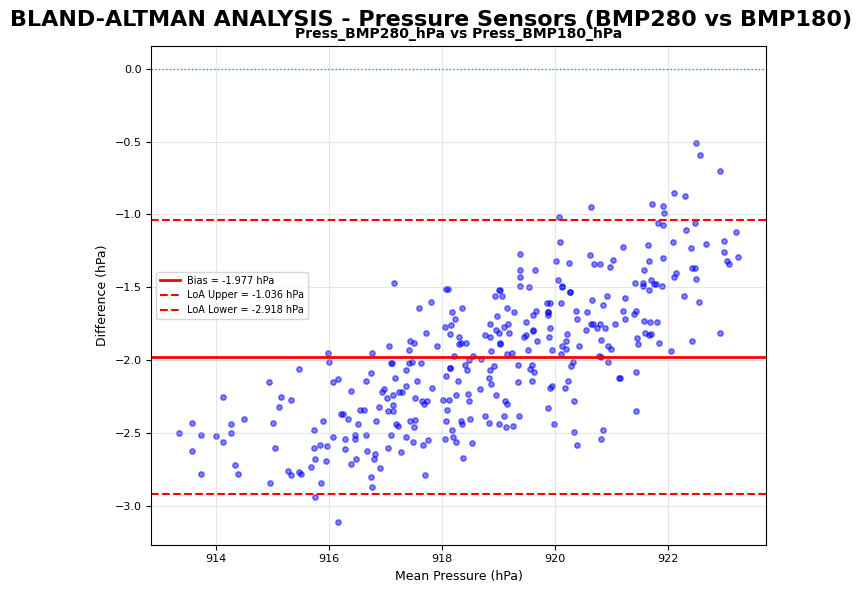


BLAND-ALTMAN RESULTS SUMMARY - PRESSURE SENSORS COMPARISON
        Sensor_1         Sensor_2      Bias  LoA_Upper  LoA_Lower     Std
Press_BMP280_hPa Press_BMP180_hPa -1.977356  -1.036459  -2.918253 0.48005


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pressure_sensors = [
    'Press_BMP280_hPa',
    'Press_BMP180_hPa'
] #Define all pressure sensors

# Convert columns to numeric (ignore non-numeric values)
for col in pressure_sensors:
    df_validation[col] = pd.to_numeric(df_validation[col], errors='coerce')

fig, axes = plt.subplots(1, 1, figsize=(7, 6)) #Create figure with one plot
results_press = [] #Storage for results

# Compare the two pressure sensors directly
sensor_1 = pressure_sensors[0]
sensor_2 = pressure_sensors[1]

data1 = df_validation[sensor_1]
data2 = df_validation[sensor_2]
mean_values = (data1 + data2) / 2  # Calculate mean
diff_values = data1 - data2 #Calculate difference
bias = diff_values.mean()  # Calculate Bland-Altman metrics
std_diff = diff_values.std() #Std
loa_upper = bias + 1.96 * std_diff  # Upper Limit of Agreement
loa_lower = bias - 1.96 * std_diff  # Lower Limit of Agreement

# Store results
results_press.append({
    'Sensor_1': sensor_1,
    'Sensor_2': sensor_2,
    'Bias': bias,
    'LoA_Upper': loa_upper,
    'LoA_Lower': loa_lower,
    'Std': std_diff
})

axes.scatter(mean_values, diff_values, alpha=0.5, s=15, color='blue')
axes.axhline(bias, color='red', linestyle='-', linewidth=2, label=f'Bias = {bias:.3f} hPa')#bias line
axes.axhline(loa_upper, color='red', linestyle='--', linewidth=1.5,
           label=f'LoA Upper = {loa_upper:.3f} hPa') # Plot LoA line upper
axes.axhline(loa_lower, color='red', linestyle='--', linewidth=1.5,   # Plot LoA line lower
           label=f'LoA Lower = {loa_lower:.3f} hPa')
axes.axhline(0, color='green', linestyle=':', linewidth=1, alpha=0.7) #Zero line

# Formatting
axes.set_title(f'{sensor_1} vs {sensor_2}', fontsize=10, fontweight='bold')
axes.set_xlabel('Mean Pressure (hPa)', fontsize=9)
axes.set_ylabel('Difference (hPa)', fontsize=9)
axes.legend(fontsize=7, loc='best')
axes.grid(True, alpha=0.3)
axes.tick_params(labelsize=8)

plt.tight_layout()
plt.suptitle('BLAND-ALTMAN ANALYSIS - Pressure Sensors (BMP280 vs BMP180)',  #title
             fontsize=16, fontweight='bold', y=0.98)
plt.subplots_adjust(top=0.92)
plt.show()

# Print summary table
df_results_press = pd.DataFrame(results_press)
print("\n" + "=" * 80)
print("BLAND-ALTMAN RESULTS SUMMARY - PRESSURE SENSORS COMPARISON")
print("=" * 80)
print(df_results_press.to_string(index=False))
print("=" * 80)

This analysis reveals a significant and systematic offset (Bias) of -1.98 hPa, indicating that the BMP280 sensor consistently measures values almost 2 hPa below the BMP180. The good news is the precision: the Standard Deviation (Std) of 0.48 hPa is very low, meaning this difference between them is extremely stable and predictable. The Limits of Agreement (from -2.92 to -1.04 hPa) confirm the sensors are not interchangeable, as the error range never crosses zero, proving there is a real calibration difference between the two units.

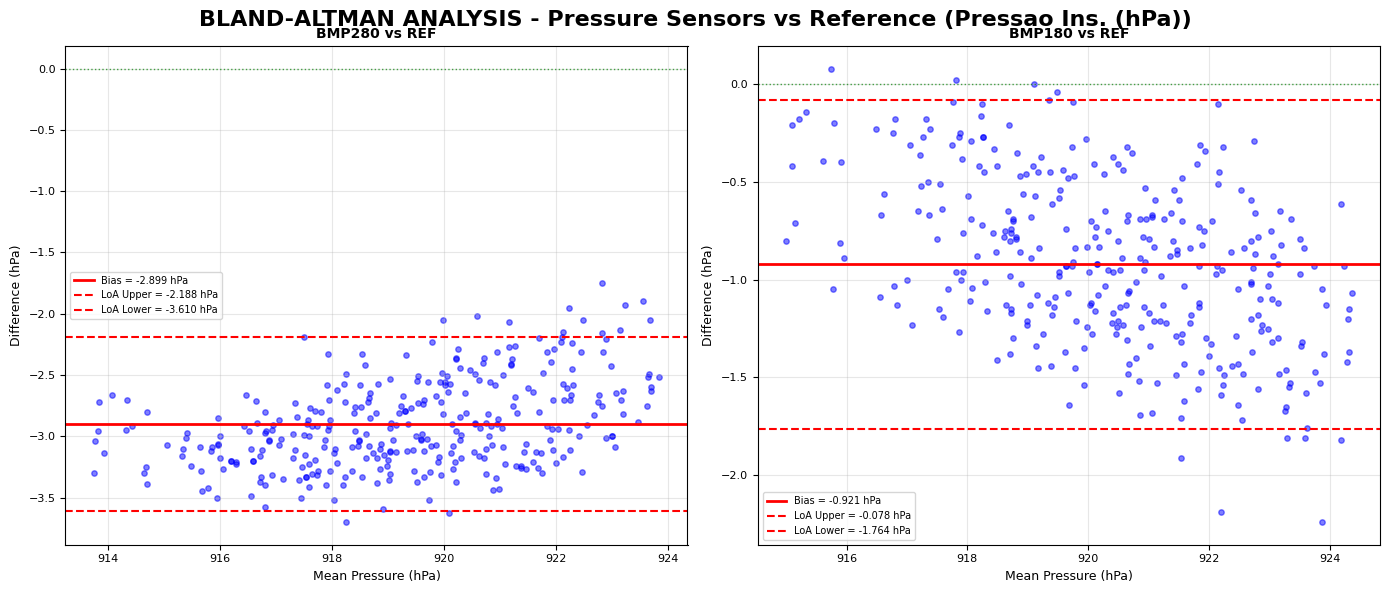


BLAND-ALTMAN RESULTS SUMMARY - PRESSURE SENSORS vs REFERENCE
          Sensor          Reference      Bias  LoA_Upper  LoA_Lower      Std
Press_BMP280_hPa Pressao Ins. (hPa) -2.898541  -2.187541  -3.609541 0.362755
Press_BMP180_hPa Pressao Ins. (hPa) -0.921185  -0.078052  -1.764319 0.430170


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

reference_press = 'Pressao Ins. (hPa)' #Reference dataset column
pressure_sensors = [
    'Press_BMP280_hPa',
    'Press_BMP180_hPa'
] #Define all pressure sensors

# Convert columns to numeric (ignore non-numeric values)
for col in pressure_sensors + [reference_press]:
    df_validation[col] = pd.to_numeric(df_validation[col], errors='coerce')

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) #Create figure with subplots (1 row x 2 columns)
axes = axes.flatten() #Flatten to 1D array for easy indexing
results_ref_press = [] #Storage for results

for idx, sensor in enumerate(pressure_sensors):
    ax = axes[idx]

    data1 = df_validation[sensor]
    data2 = df_validation[reference_press]
    mean_values = (data1 + data2) / 2  # Calculate mean
    diff_values = data1 - data2 #Calculate difference
    bias = diff_values.mean()  # Calculate Bland-Altman metrics
    std_diff = diff_values.std() #Std
    loa_upper = bias + 1.96 * std_diff  # Upper Limit of Agreement
    loa_lower = bias - 1.96 * std_diff  # Lower Limit of Agreement

    # Store results
    results_ref_press.append({
        'Sensor': sensor,
        'Reference': reference_press,
        'Bias': bias,
        'LoA_Upper': loa_upper,
        'LoA_Lower': loa_lower,
        'Std': std_diff
    })

    ax.scatter(mean_values, diff_values, alpha=0.5, s=15, color='blue')
    ax.axhline(bias, color='red', linestyle='-', linewidth=2, label=f'Bias = {bias:.3f} hPa')#bias line
    ax.axhline(loa_upper, color='red', linestyle='--', linewidth=1.5,
               label=f'LoA Upper = {loa_upper:.3f} hPa') # Plot LoA line upper
    ax.axhline(loa_lower, color='red', linestyle='--', linewidth=1.5,   # Plot LoA line lower
               label=f'LoA Lower = {loa_lower:.3f} hPa')
    ax.axhline(0, color='green', linestyle=':', linewidth=1, alpha=0.7) #Zero line

    # Formatting
    sensor_short = sensor.replace('Press_', '').replace('_hPa', '')
    ax.set_title(f'{sensor_short} vs REF', fontsize=10, fontweight='bold')
    ax.set_xlabel('Mean Pressure (hPa)', fontsize=9)
    ax.set_ylabel('Difference (hPa)', fontsize=9)
    ax.legend(fontsize=7, loc='best')
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)

plt.tight_layout()
plt.suptitle('BLAND-ALTMAN ANALYSIS - Pressure Sensors vs Reference (Pressao Ins. (hPa))',  #title
             fontsize=16, fontweight='bold', y=0.98)
plt.subplots_adjust(top=0.92)
plt.show()

# Print summary table
df_results_ref_press = pd.DataFrame(results_ref_press)
print("\n" + "=" * 80)
print("BLAND-ALTMAN RESULTS SUMMARY - PRESSURE SENSORS vs REFERENCE")
print("=" * 80)
print(df_results_ref_press.to_string(index=False))
print("=" * 80)


This analysis shows that both sensors are highly precise (low Std), with the BMP280 (0.36) being slightly more stable than the BMP280 (0.43). However, the BMP180 is much more accurate, with an offset (Bias) of only -0.92 hPa, which is acceptable or easily correctable. The BMP280, on the other hand, is systematically inaccurate, with a Bias of -2.90 hPa, consistently reading almost 3 hPa below the reference, making it unusable without mandatory software calibration.